In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report



import os
for dirname, _, filenames in os.walk('/dataset2/fruits-360_dataset/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
train_path = "training/"
test_path = "test/"

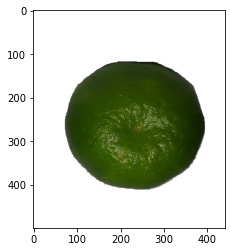

In [4]:
img = load_img(train_path + "Orange unripe/orangevertical6.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

In [5]:
img = img_to_array(img)
img.shape

(500, 440, 3)

In [6]:
model = Sequential()

model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
# model.add(Conv2D(32, 3, activation="relu"))

model.add(MaxPooling2D())
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(5000, activation = "relu"))
model.add(Dense(1024, activation = "relu"))
model.add(Dense(512, activation = "relu"))
#model.add(Dense(128, activation = "softmax"))
model.add(Dense(64, activation = "softmax"))
model.add(Dense(15, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 flatten (Flatten)           (None, 33856)             0

In [7]:
model.compile(loss="categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 16,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 16,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 9997 images belonging to 15 classes.
Found 1422 images belonging to 15 classes.


In [9]:
filepath="fruit_detection_2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 40,
                   epochs = 40,
                   validation_data = test_generator,
                   validation_steps = 40)



<ipython-input-9-c97c164cfbc5>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/40
40/40 [==============================] - 91s 2s/step - loss: 2.7054 - accuracy: 0.0922 - val_loss: 2.7011 - val_accuracy: 0.0766
Epoch 2/40
40/40 [==============================] - 76s 2s/step - loss: 2.6992 - accuracy: 0.1109 - val_loss: 2.6959 - val_accuracy: 0.0891
Epoch 3/40
40/40 [==============================] - 80s 2s/step - loss: 2.6916 - accuracy: 0.1219 - val_loss: 2.6945 - val_accuracy: 0.0859
Epoch 4/40
40/40 [==============================] - 80s 2s/step - loss: 2.6837 - accuracy: 0.1422 - val_loss: 2.6971 - val_accuracy: 0.0812
Epoch 5/40
40/40 [==============================] - 80s 2s/step - loss: 2.6812 - accuracy: 0.1422 - val_loss: 2.6912 - val_accuracy: 0.0844
Epoch 6/40
40/40 [==============================] - 85s 2s/step - loss: 2.6713 - accuracy: 0.1516 - val_loss: 2.6831 - val_accuracy: 0.0844
Epoch 7/40
40/40 [==============================] - 81s 2s/step - loss: 2.6732 - accuracy: 0.1234 - val_loss: 2.6855 - val_accuracy: 0.0906
Epoch 8/40
40/40 [==